___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans ,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.shape

(200, 5)

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns = {'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.duplicated().sum()

0

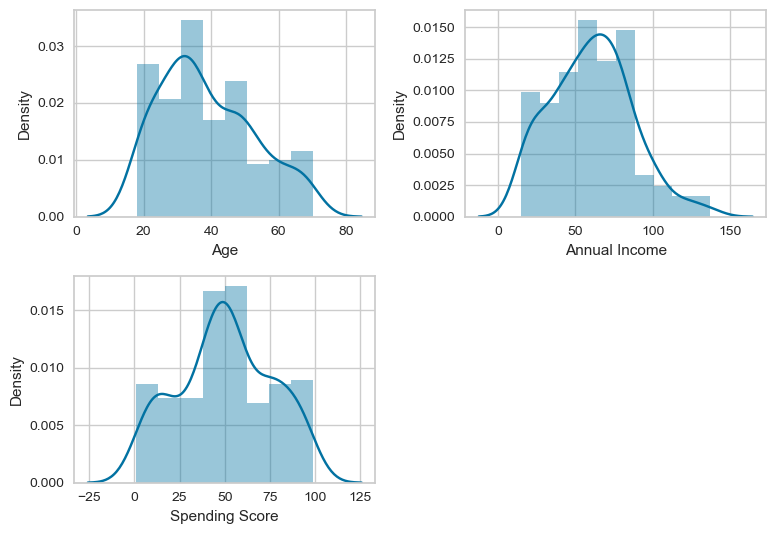

In [8]:
for i, column in enumerate(df[['Age','Annual Income','Spending Score']] , 1):
    plt.subplot(2,2,i)
    sns.distplot(df[column])
    plt.tight_layout()

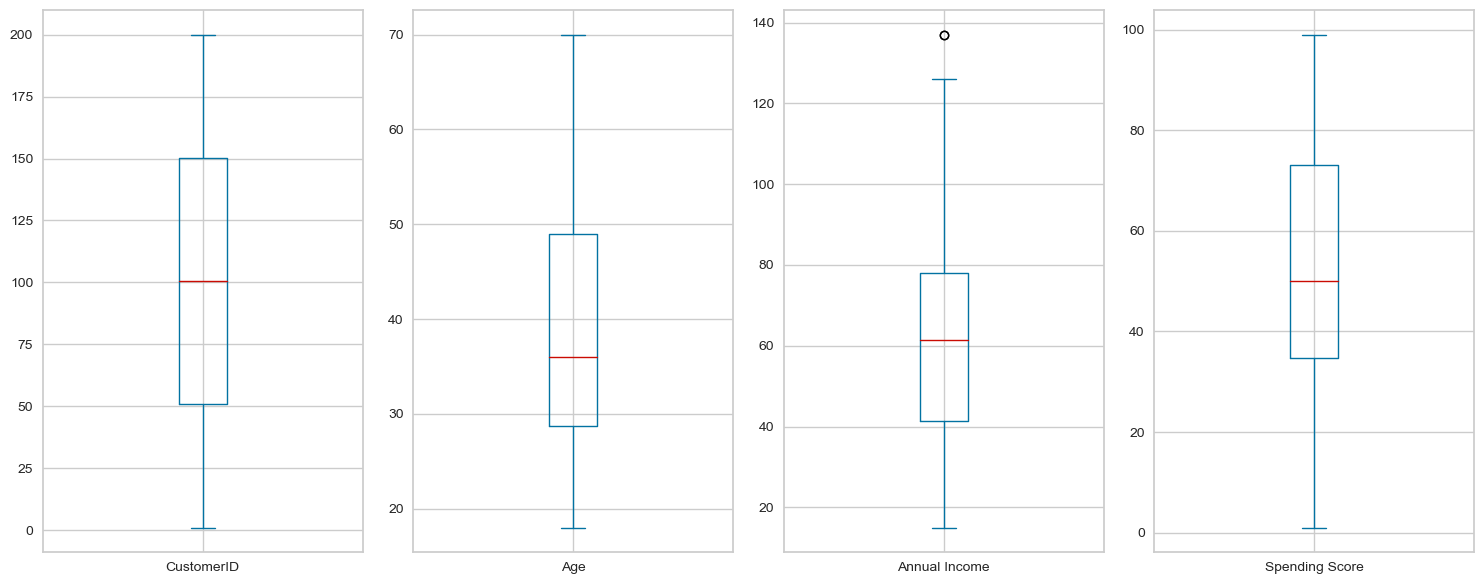

In [9]:
df.plot( kind="box", subplots=True, figsize=(15, 6))
plt.tight_layout();

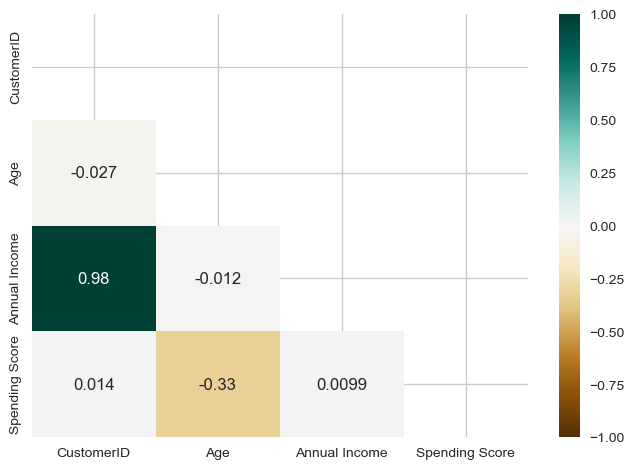

In [10]:
mask = np.triu(np.ones_like(df.corr())) #mask for the upper half
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

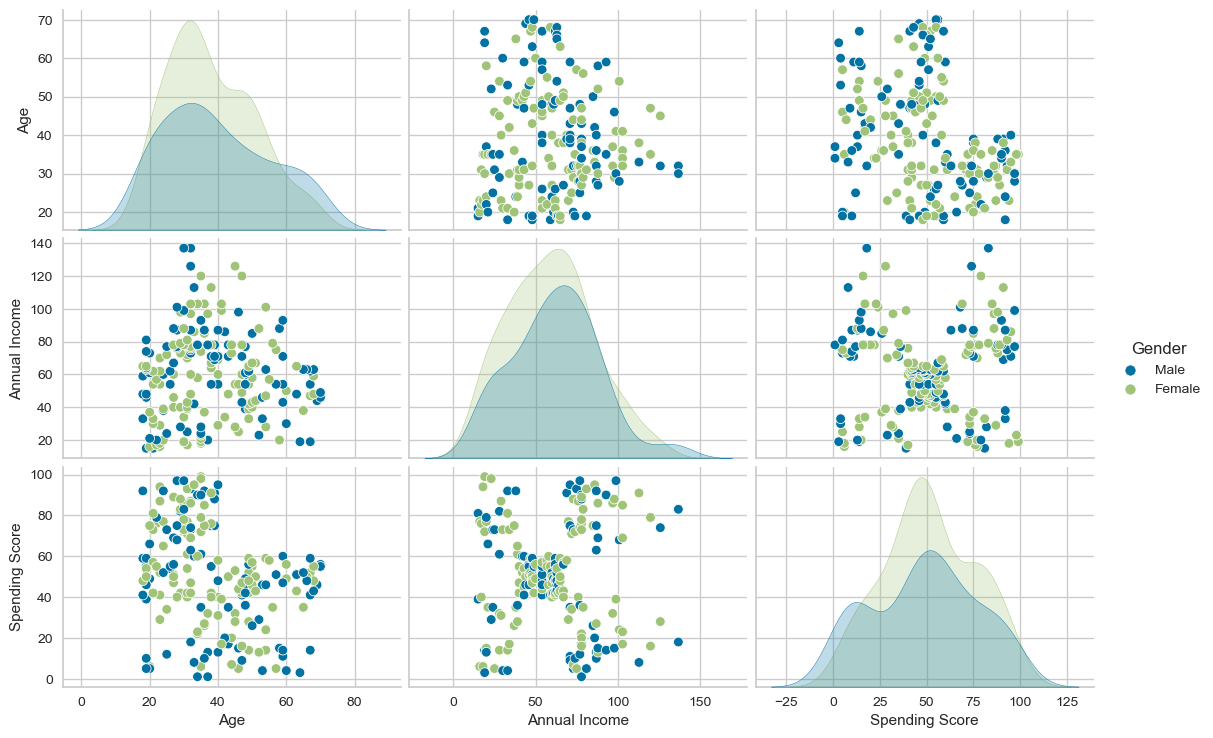

In [11]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5);

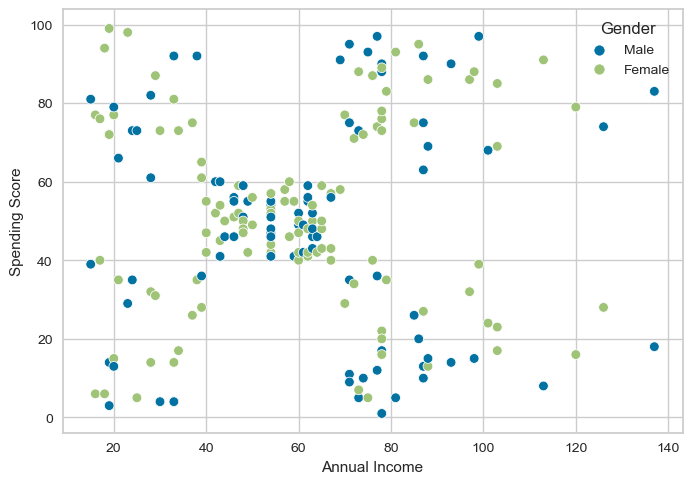

In [12]:
sns.scatterplot(x='Annual Income', y='Spending Score', data=df, hue="Gender")
plt.show()

---
---

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [13]:
df2 = df[['Age' , 'Spending Score' ]]
df2.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

#### Elbow method

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

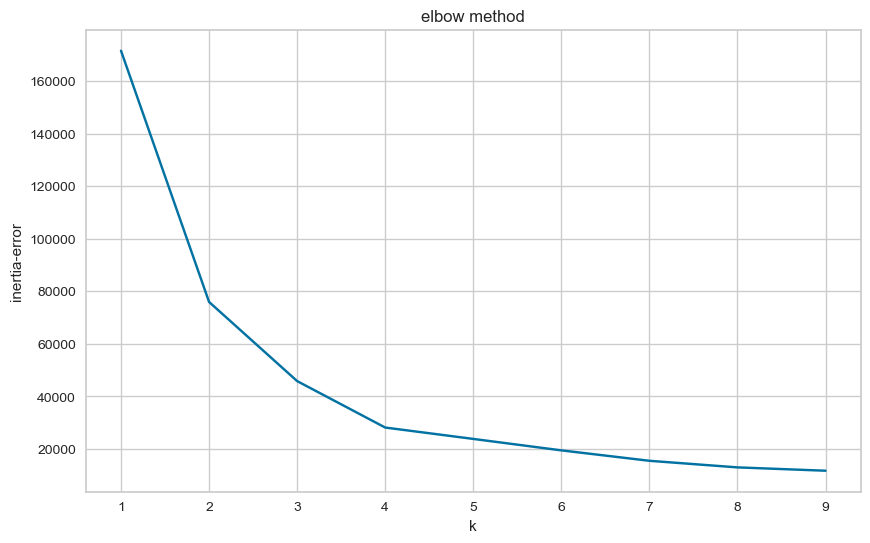

In [14]:
ssd = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    ssd.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia-error')
plt.title("elbow method")
plt.show()

In [15]:
ssd = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    ssd.append(kmeanModel.inertia_)

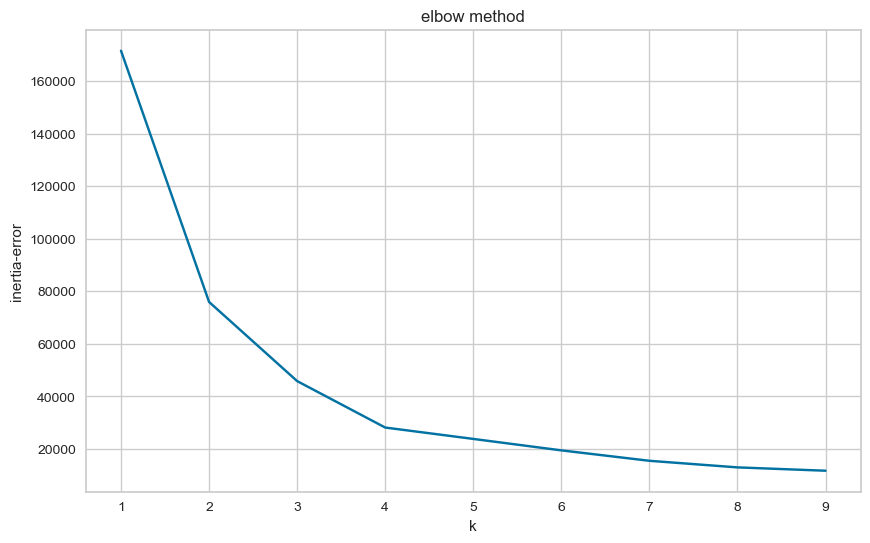

In [16]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia-error')
plt.title("elbow method")
plt.show()

#  4 clusters is the optimal k

In [17]:
-pd.Series(ssd).diff()
#from 4 to below no huge different 

0             NaN
1    95586.343990
2    30108.479394
3    17675.093049
4     4327.334745
5     4355.130911
6     3968.924776
7     2507.709506
8     1268.463332
dtype: float64

In [18]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:

    kmeanModel = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeanModel.fit(df2)
    cluster_labels = kmeanModel.labels_
   
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


In [19]:
K = range(1, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    distances = kmeanModel.transform(df2) 
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result)) 

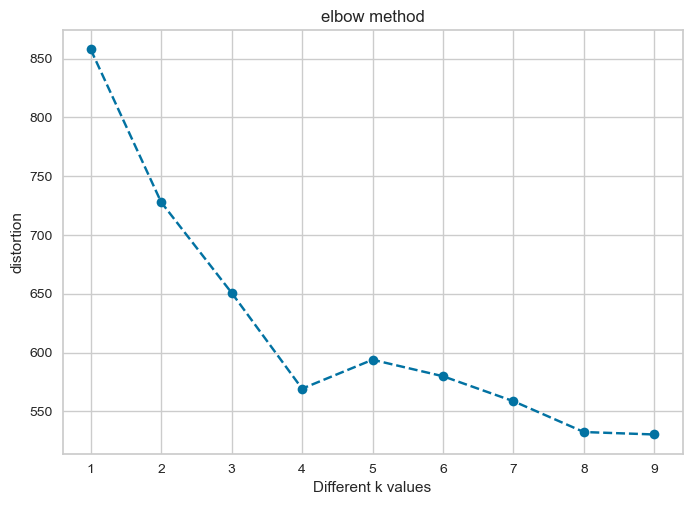

In [20]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

#  4 clusters is the optimal k

### Why silhouette_score is negative?

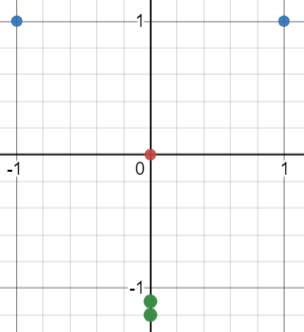

#### *iii. Apply K Means*

In [21]:
kmeanModel_AS = KMeans(n_clusters=4, random_state=42)

In [22]:
kmeanModel_AS.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [23]:
kmeanModel_AS.predict(df2)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [24]:
clusters = kmeanModel_AS.labels_
clusters

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
centers = kmeanModel_AS.cluster_centers_
centers

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [26]:
s1 = silhouette_score(df2, kmeanModel_AS.labels_)
s1

0.49973941540141753

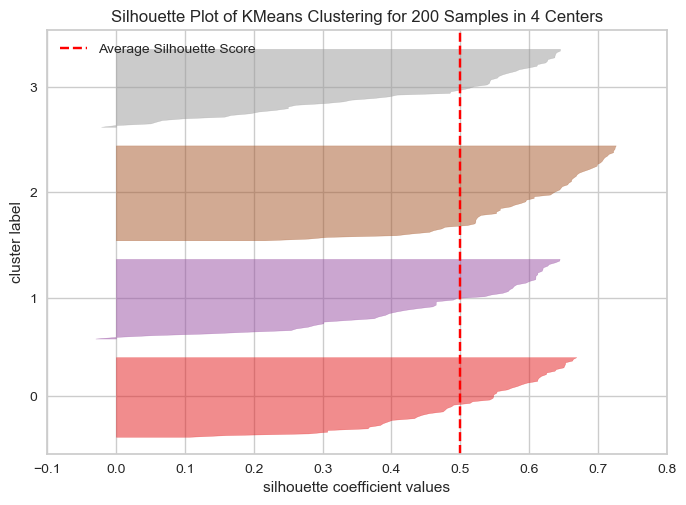

In [27]:

visualizer = SilhouetteVisualizer(kmeanModel_AS)
visualizer.fit(df2)   
visualizer.poof();


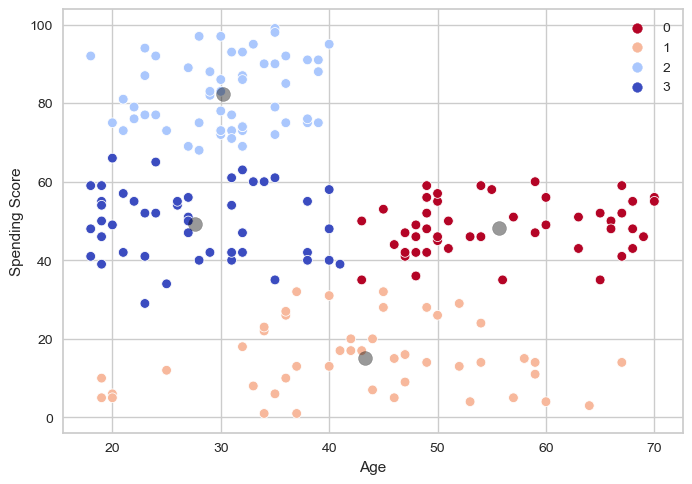

In [28]:
sns.scatterplot(data= df2 , x= df2['Age'] , y= df2['Spending Score'] , hue= clusters , palette= "coolwarm_r" )
plt.scatter(centers[:,0] , centers[:,1] , c = 'black' , s= 100 ,alpha= 0.4 )

In [29]:
temp = pd.DataFrame(clusters ,columns=["cluster"])
dataframes = [df,temp]
print(df.shape)
print(temp.shape)

(200, 5)
(200, 1)


In [30]:
result_model1 = pd.concat( dataframes ,axis=1)
result_model1.shape

(200, 6)

In [31]:
result_model1.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


2    57
1    48
0    48
3    47
Name: cluster, dtype: int64


<Axes: >

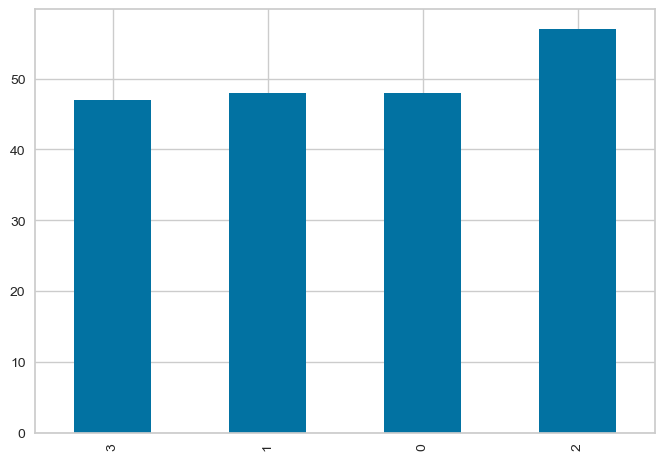

In [32]:
print(result_model1["cluster"].value_counts())
result_model1["cluster"].value_counts().sort_values().plot(kind='bar')

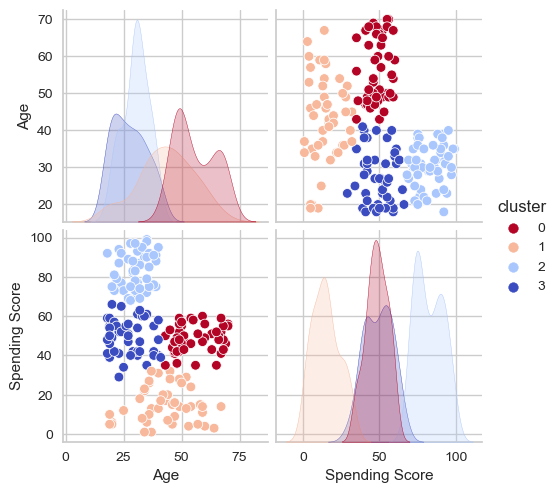

In [33]:
sns.pairplot(result_model1[['Age', 'Spending Score', 'cluster']], hue='cluster' ,palette= "coolwarm_r")

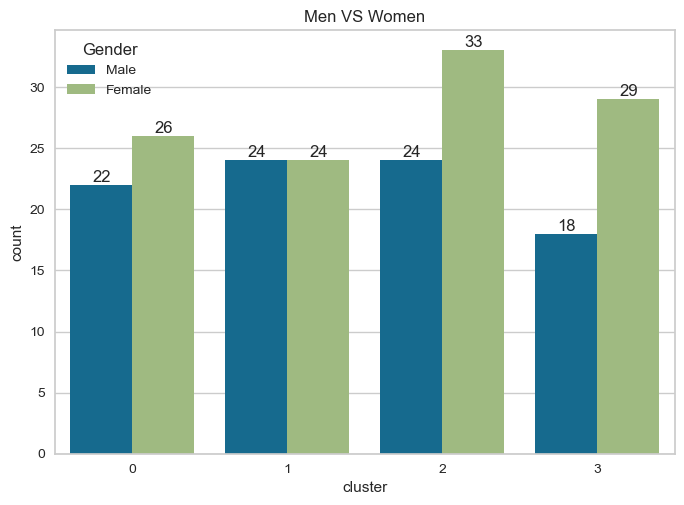

In [34]:
#kmeans
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=result_model1.cluster , hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

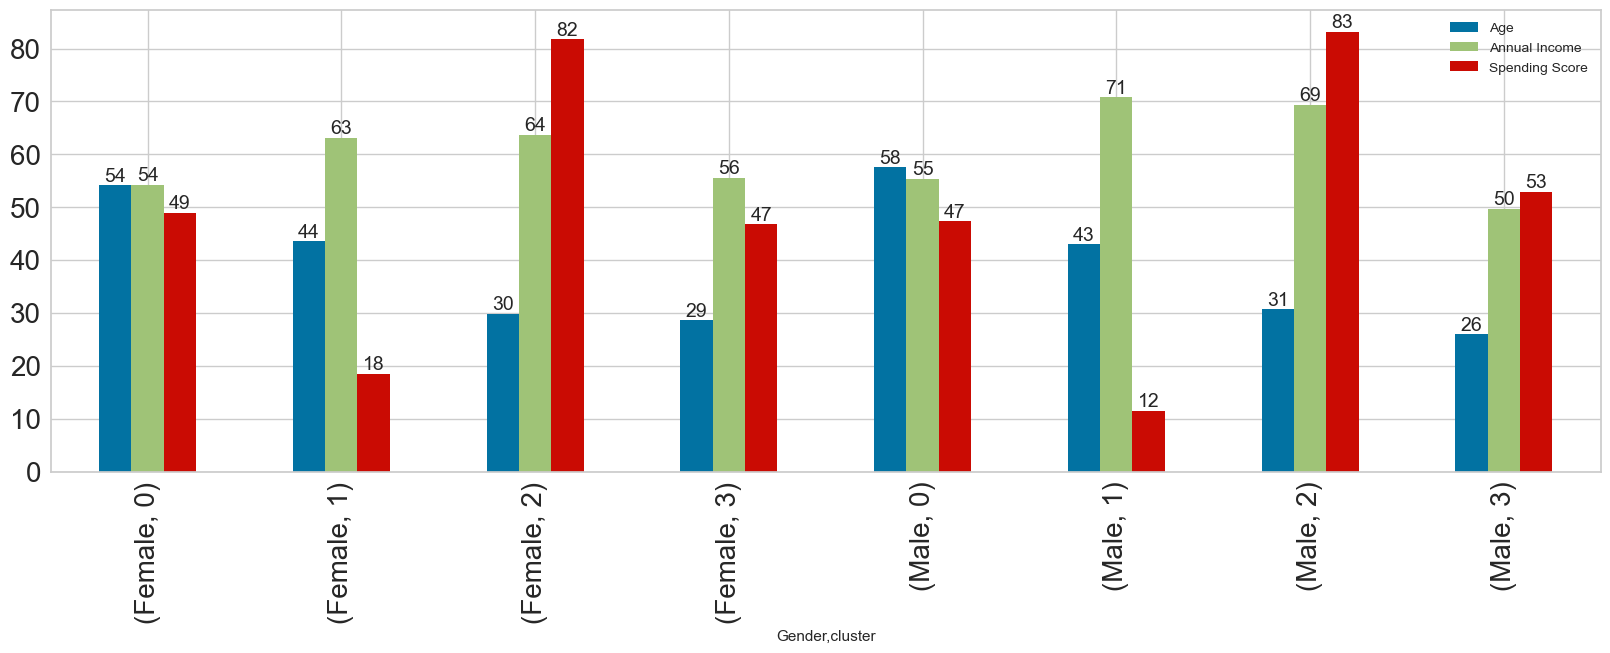

In [35]:
ax = result_model1.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

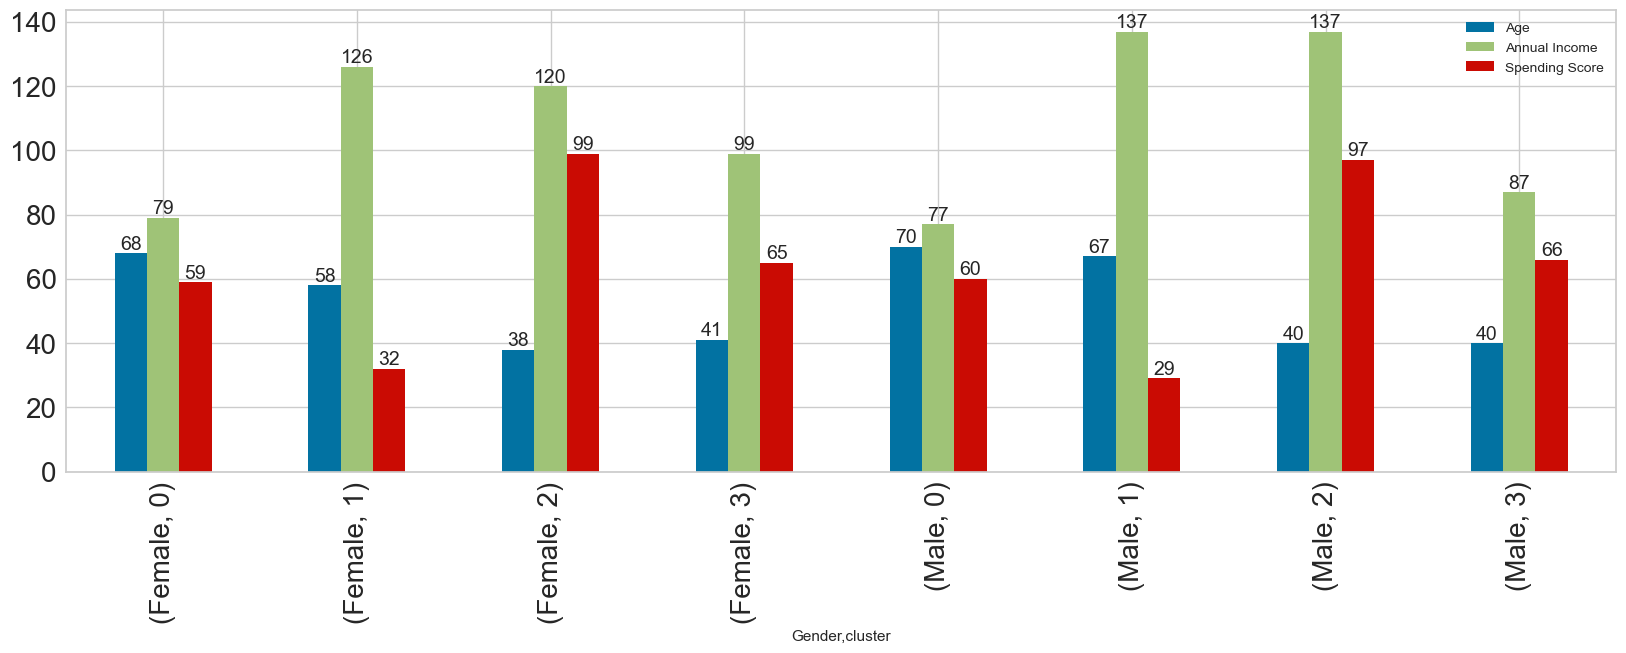

In [36]:
ax = result_model1.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).max().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

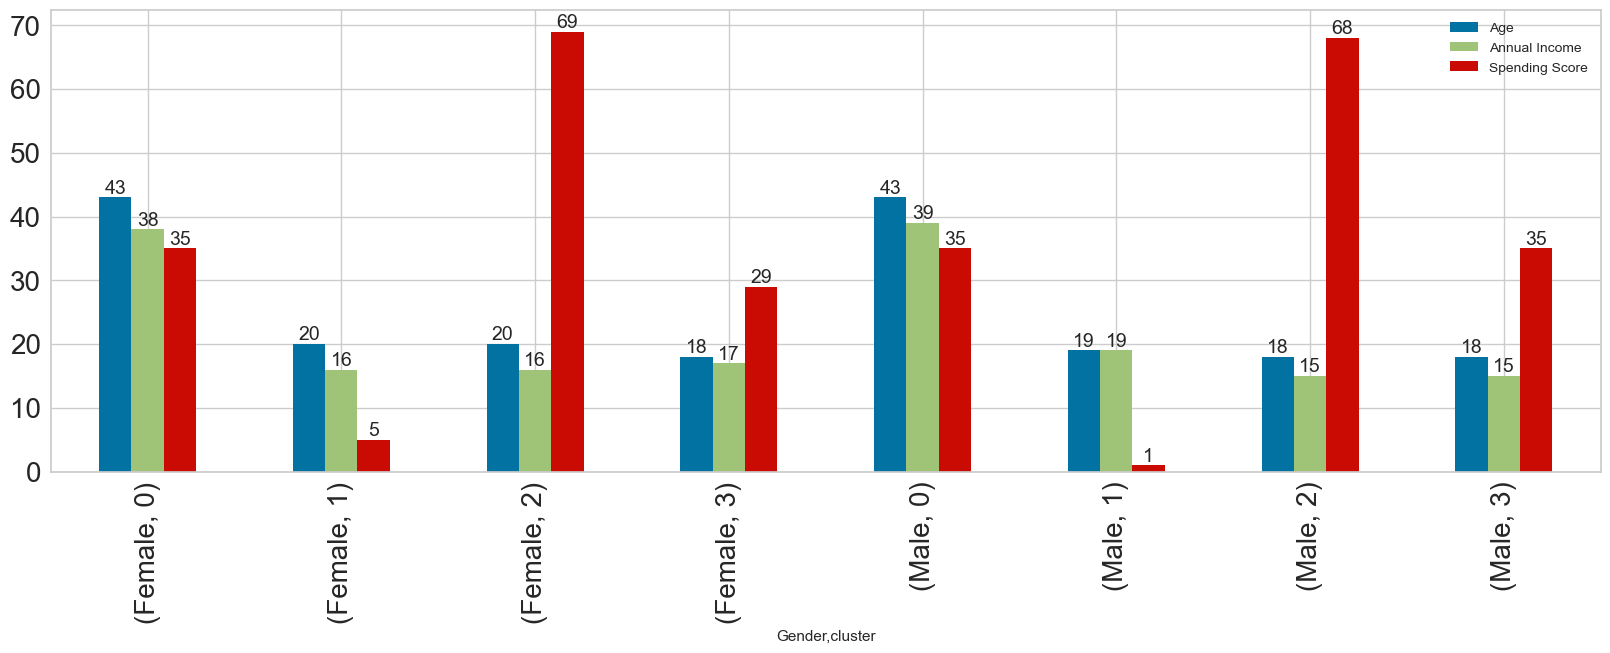

In [37]:
ax = result_model1.drop(columns = ['CustomerID']).groupby([ "Gender","cluster"]).min().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

# Conclusion of Kmeans model (Age & Spending Score)

- Class0(24%)(**Normal Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 35 and the most is 60.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
  age above 43 for both in males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 older customers have normal spend of their money.<br> &ensp;
  
- Class1(24%)(**Low Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 1 and the most is 32.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 There is no specific age range for males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers wide different ages and do not spend their money.<br> &ensp;
 
- Class2(28.5%)(**Super Spender Customers**):<br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 64 and the most is 99.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
  age about 20 to 40 for both in males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 middle age customers tend to spend of their money.<br> &ensp;
                                          
- Class3(23.5% )(**Unstable Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 20 and the most is 66. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
  age about 18 to 40 for both in males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 middle age customers and wide different spending.<br> &ensp;
  
  
- **Class2 and Class3 share the same range age but we can see coustomer in Class3 has lower Income**

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [38]:
df3 = df[['Annual Income' , 'Spending Score' ]]
df3.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

In [39]:
ssd = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    ssd.append(kmeanModel.inertia_)


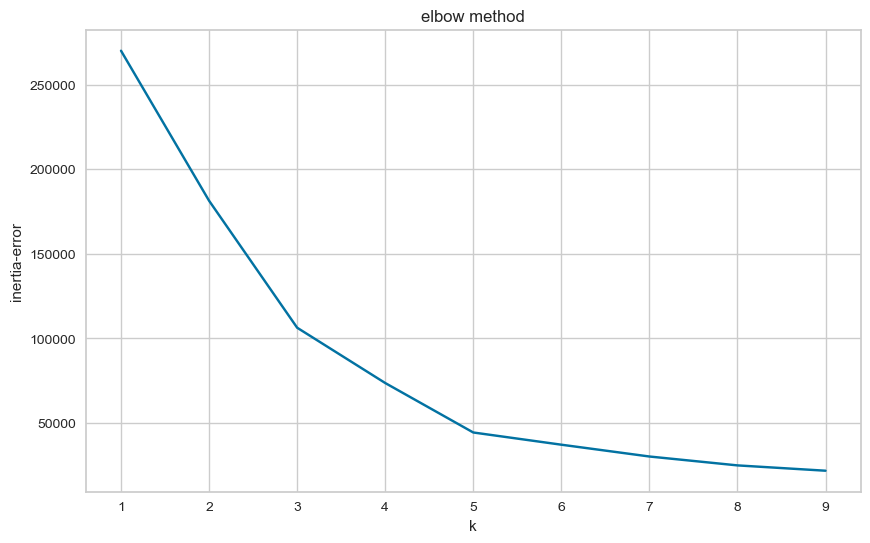

In [40]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia-error')
plt.title("elbow method")
plt.show()
#  5 clusters is the optimal k

In [41]:
-pd.Series(ssd).diff()

0             NaN
1    88617.684040
2    75015.222897
3    32668.584023
4    29231.333592
5     7214.640937
6     6974.157303
7     5247.817858
8     3149.746677
dtype: float64

In [42]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:

    kmeanModel = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeanModel.fit(df3)
    cluster_labels = kmeanModel.labels_
   
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266


In [43]:
K = range(1, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    distances = kmeanModel.transform(df3) 
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result)) 

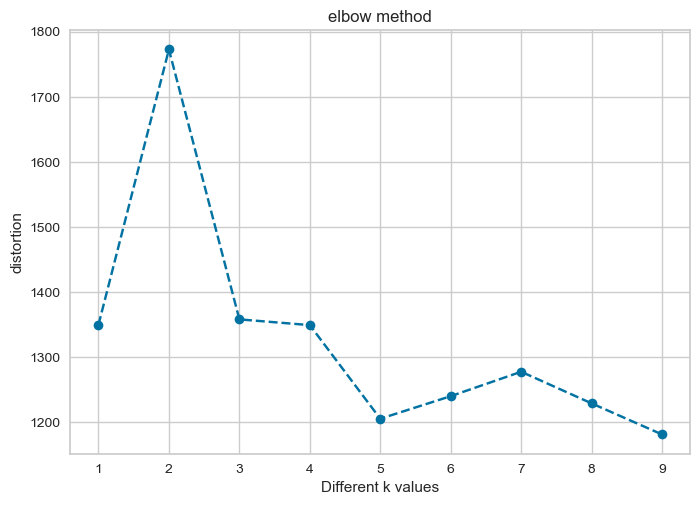

In [44]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()


#### *iii. Apply K Means*

In [45]:
kmeanModel_AnS = KMeans(n_clusters=5, random_state=42)

In [46]:
kmeanModel_AnS.fit(df3)

KMeans(n_clusters=5, random_state=42)

In [47]:
kmeanModel_AnS.predict(df3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### *iv. Visualizing and Labeling All the Clusters*

In [48]:
clusters2 = kmeanModel_AnS.labels_
clusters2

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [49]:
centers2 = kmeanModel_AnS.cluster_centers_
centers2

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [50]:
s2 =silhouette_score(df3, kmeanModel_AnS.labels_)
s2

0.553931997444648

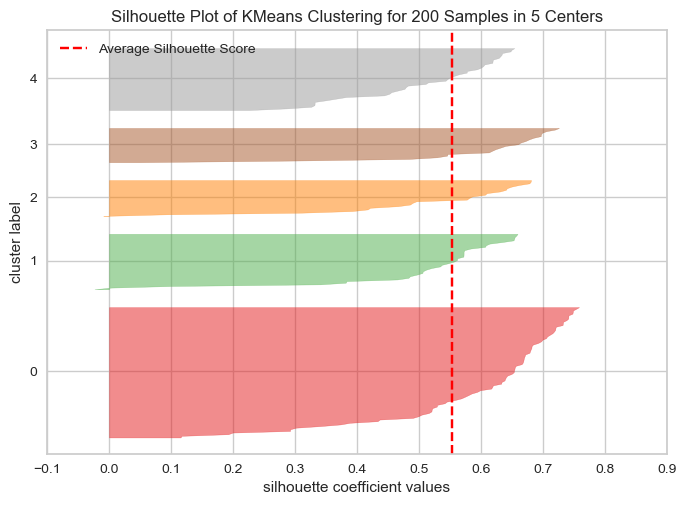

In [51]:
visualizer = SilhouetteVisualizer(kmeanModel_AnS)
visualizer.fit(df3)   
visualizer.poof();

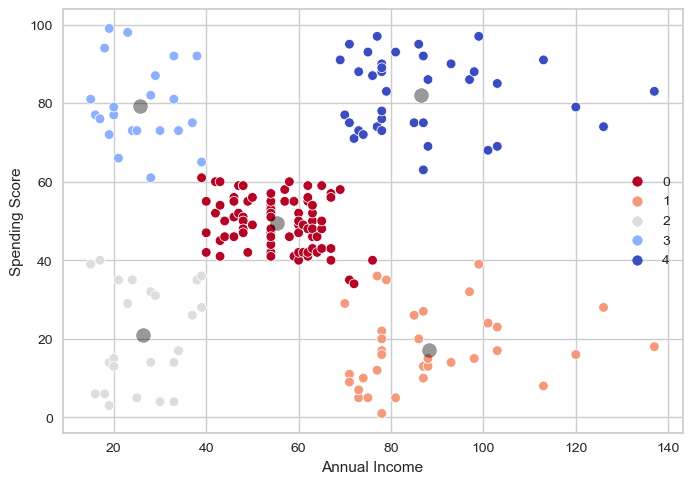

In [52]:
sns.scatterplot(data= df3 , x= df3['Annual Income'] , y= df3['Spending Score'] , hue= clusters2 , palette= "coolwarm_r" )
plt.scatter(centers2[:,0] , centers2[:,1] , c = 'black' , s= 100 ,alpha= 0.4 )

In [53]:
temp = pd.DataFrame(clusters2 ,columns=["cluster"])
dataframes = [df,temp]
print(df.shape)
print(temp.shape)

(200, 5)
(200, 1)


In [54]:
result_model2 = pd.concat( dataframes ,axis=1)
result_model2.shape

(200, 6)

In [55]:
result_model2.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64


<Axes: >

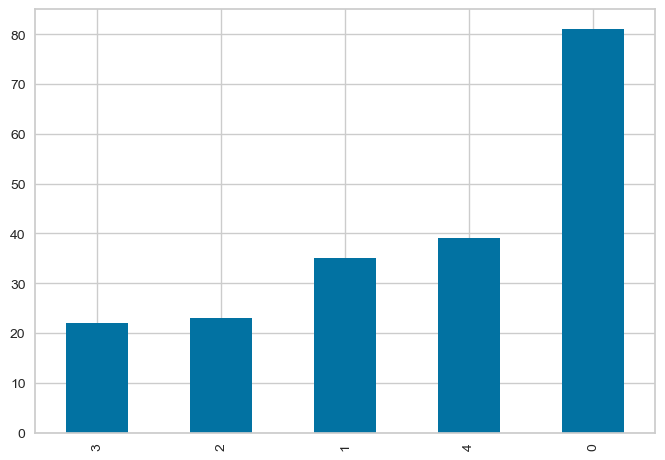

In [56]:
print(result_model2["cluster"].value_counts())
result_model2["cluster"].value_counts().sort_values().plot(kind='bar')

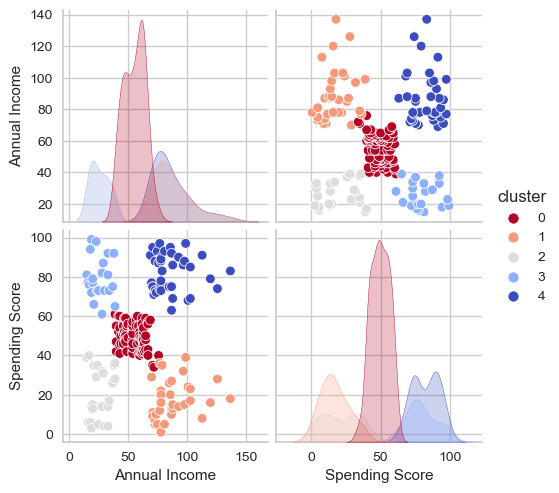

In [57]:
sns.pairplot(result_model2[['Annual Income', 'Spending Score', 'cluster']], hue='cluster' ,palette= "coolwarm_r")

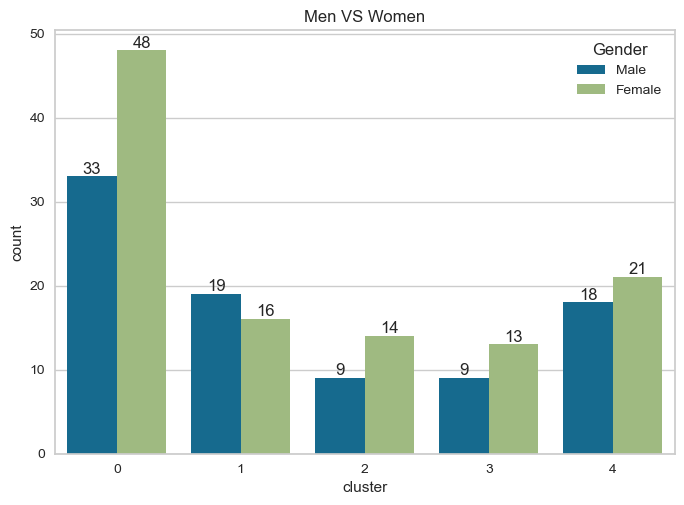

In [58]:
#kmeans
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=result_model2.cluster , hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

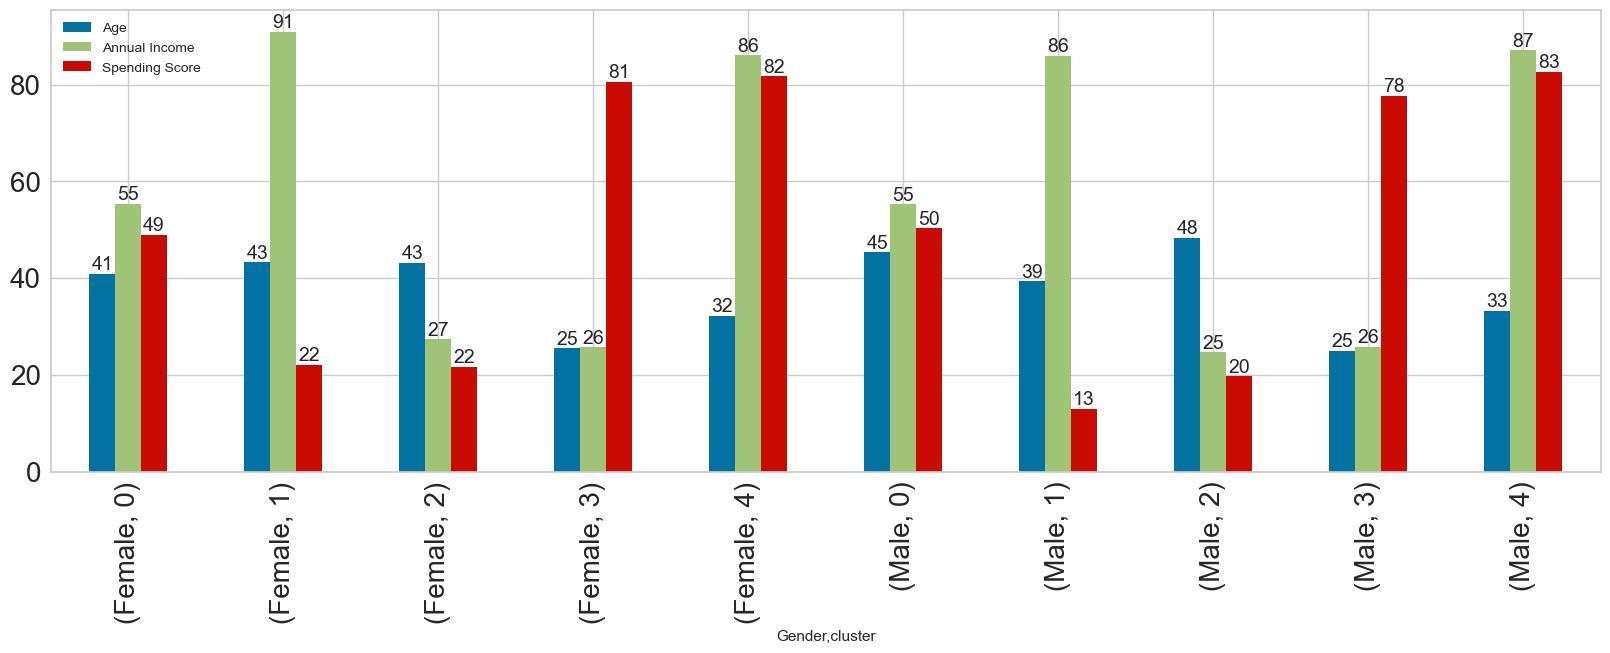

In [59]:
ax = result_model2.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

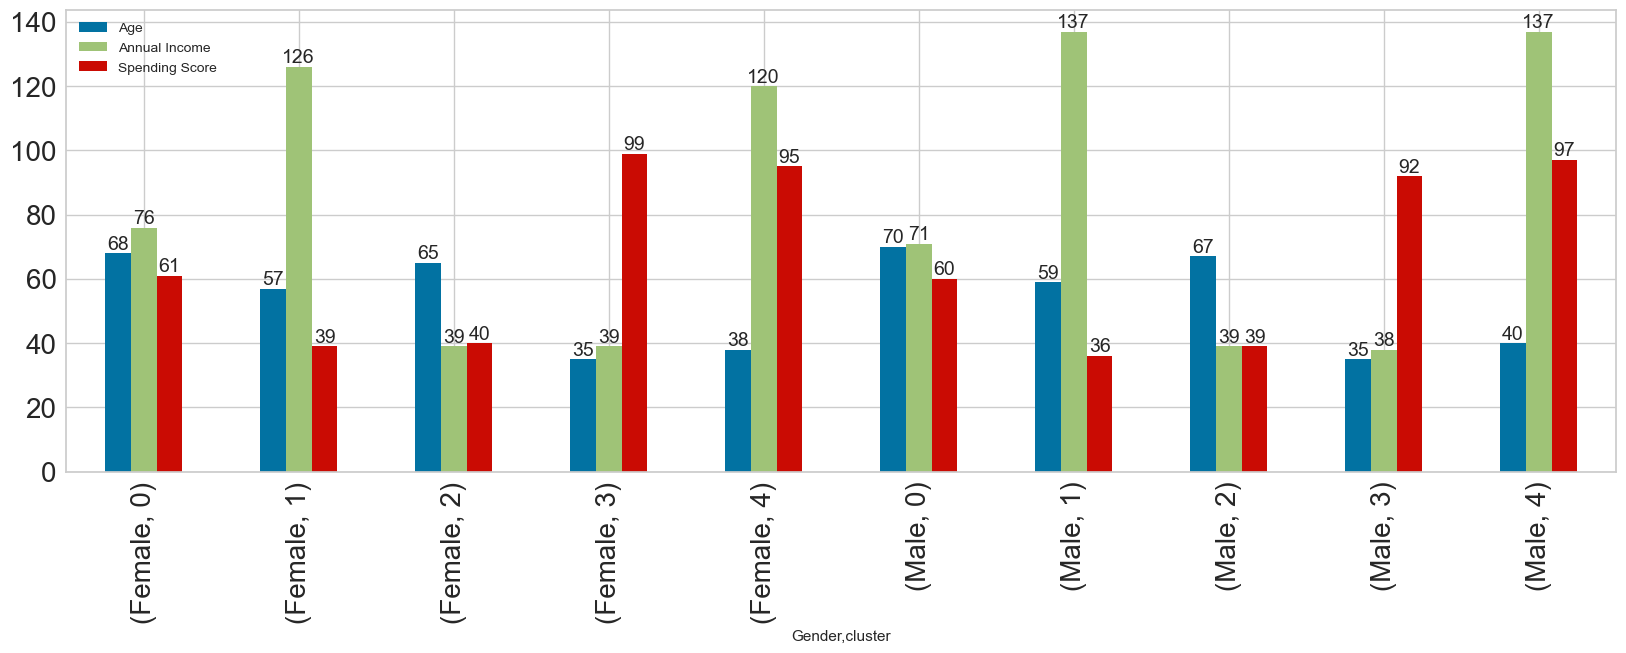

In [60]:
ax = result_model2.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).max().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

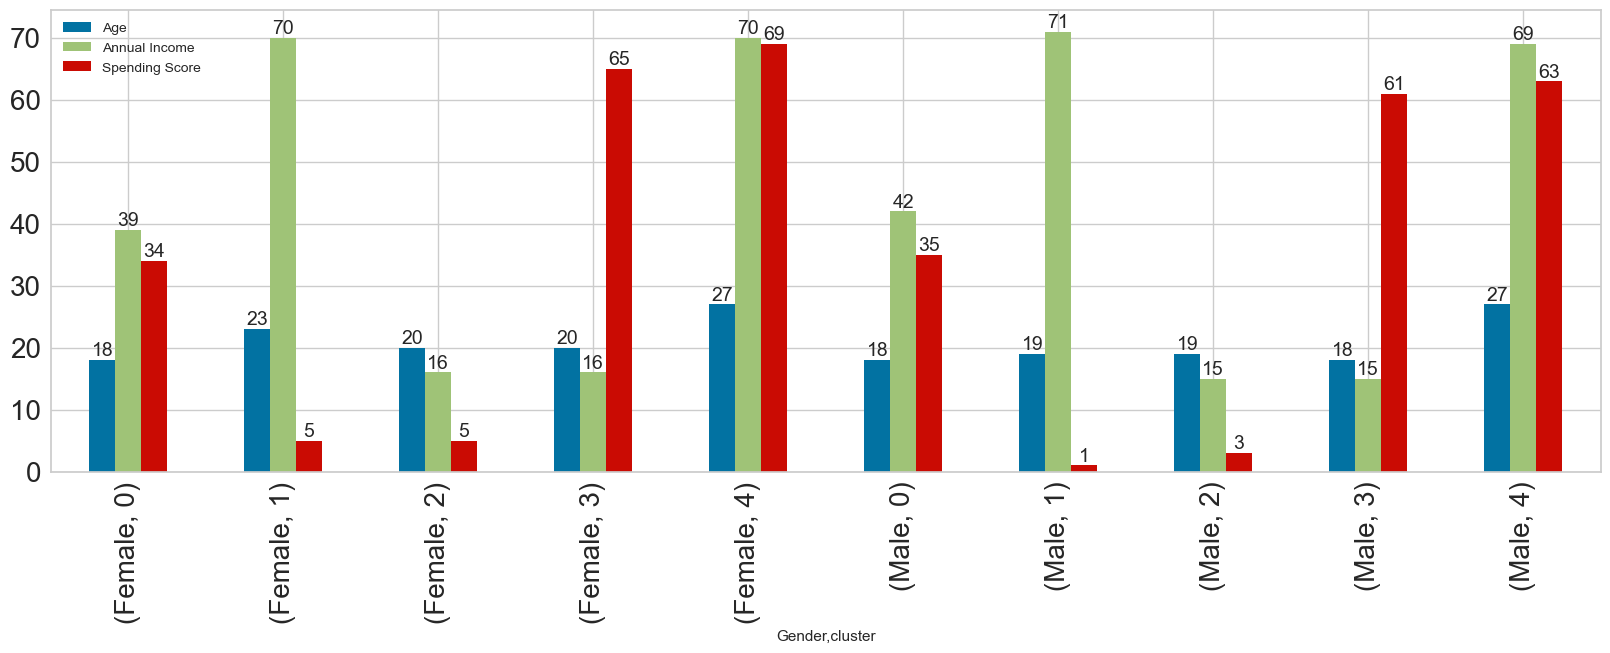

In [61]:
ax = result_model2.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).min().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

# Conclusion of Kmeans model (Annual Income & Spending Score)

- Class0(40.5%)(**Normal Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 34 and the most is 61.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
  income about 40 to 75 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have normal income and normal spend of their money. <br> &ensp;
  
- Class1(17.5%)(**Low Spender Customers 1**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 
the minimum spending is 1 and the most is 39.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 70 to 137 males and 127 for females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have high income but they do not spend thier money. <br> &ensp;
 
- Class2(11.5%)(**Low Spender Customers 2**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 3 and the most is 40.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 15 to 39 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have low income and low spend of their money.<br> &ensp;
                                          
- Class3(11%)(**Super Spender Customers 1**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 61 and the most is 99. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 15 to 39 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have low income but they spending their money. <br> &ensp;
                                            
- Class4(19.5%)(**Super Spender Customers 2**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 63 and the most is 97. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 70 to 137 males and 127 for females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have high income and high spend of their money.
  

---

---

---

---

# Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [62]:
df4 = df.drop('CustomerID', axis=1).copy()
df4.shape

(200, 4)

In [63]:
df4['Gender'] = df4['Gender'].map({'Male':0, 'Female':1})

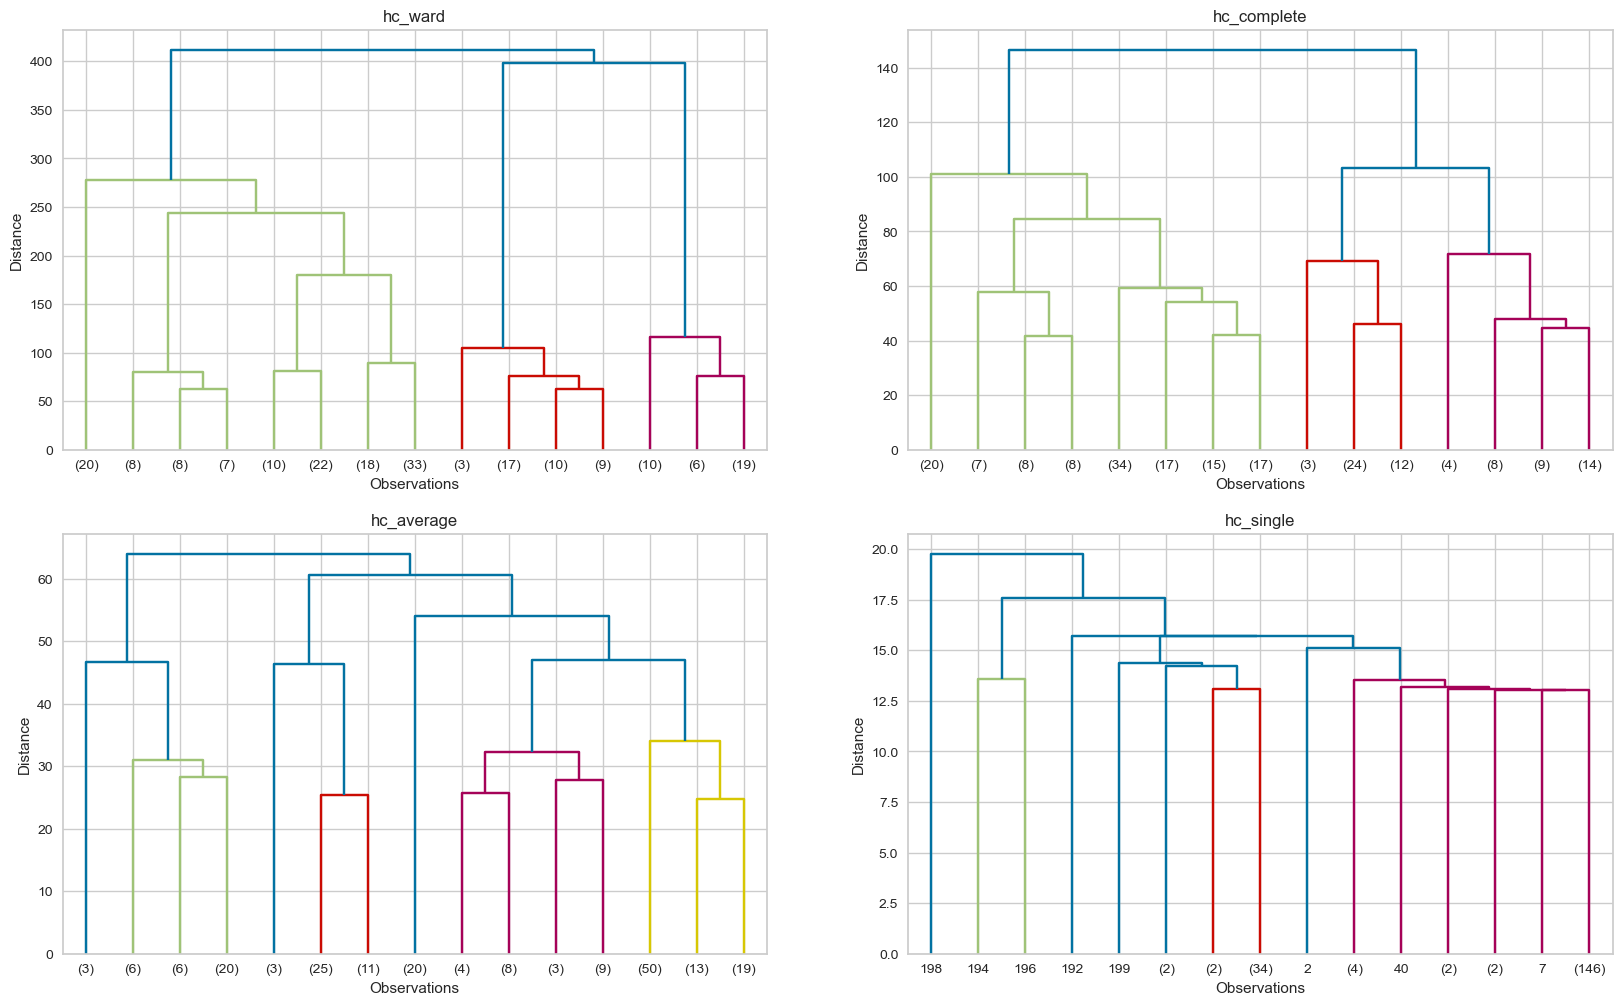

In [64]:
linkage_dict = {"hc_ward" : linkage(df4, method = "ward"),
                "hc_complete" : linkage(df4, "complete"),
                "hc_average" : linkage(df4, "average"),
                "hc_single" : linkage(df4, "single")}

plot_list = list(range(221,225))
plt.figure(figsize = (20,12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p =15, leaf_font_size = 10)
    

In [65]:
K = range(2,10)

for k in K:
    his_model = AgglomerativeClustering(n_clusters=k)
    his_model.fit_predict(df4)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df4, his_model.labels_)}')

Silhouette Score for 2 clusters: 0.29916602844367
Silhouette Score for 3 clusters: 0.3812859576468096
Silhouette Score for 4 clusters: 0.4102091359195185
Silhouette Score for 5 clusters: 0.43997527212476695
Silhouette Score for 6 clusters: 0.4428008535928764
Silhouette Score for 7 clusters: 0.42593881050851595
Silhouette Score for 8 clusters: 0.4223297424559345
Silhouette Score for 9 clusters: 0.37773214836148283


## Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [66]:
his_model1 = AgglomerativeClustering(n_clusters=4, metric="euclidean",linkage="ward")

In [67]:
his_model1.fit_predict(df2)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### Annual Income and Spending Score- x2

In [68]:
his_model2 = AgglomerativeClustering(n_clusters=5, metric="euclidean",linkage="ward")

In [69]:
his_model2.fit_predict(df3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [70]:
clusters3 = his_model1.labels_
clusters3

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [71]:
s3 =silhouette_score(df2, his_model1.labels_)
s3

0.4602496389565028

<Axes: xlabel='Age', ylabel='Spending Score'>

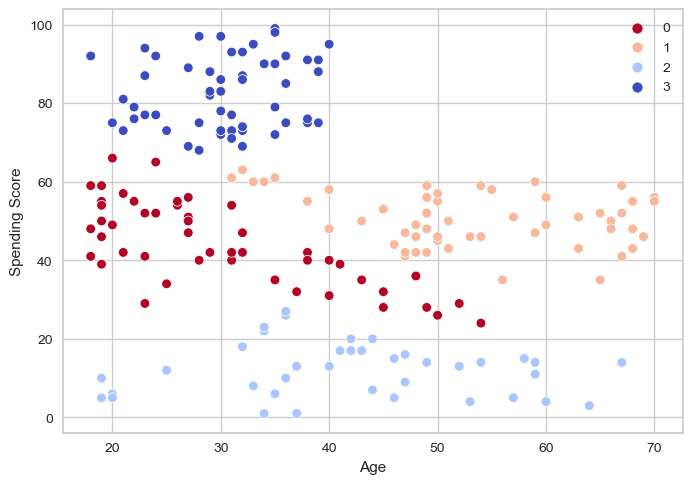

In [72]:
sns.scatterplot(data= df2 , x= df2['Age'] , y= df2['Spending Score'] , hue= clusters3 , palette= "coolwarm_r" )

In [73]:
temp = pd.DataFrame(clusters3 ,columns=["cluster"])
dataframes = [df,temp]
print(df.shape)
print(temp.shape)

(200, 5)
(200, 1)


In [74]:
result_model3 = pd.concat( dataframes ,axis=1)
result_model3.shape

(200, 6)

In [75]:
result_model3.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


3    57
1    53
0    50
2    40
Name: cluster, dtype: int64


<Axes: >

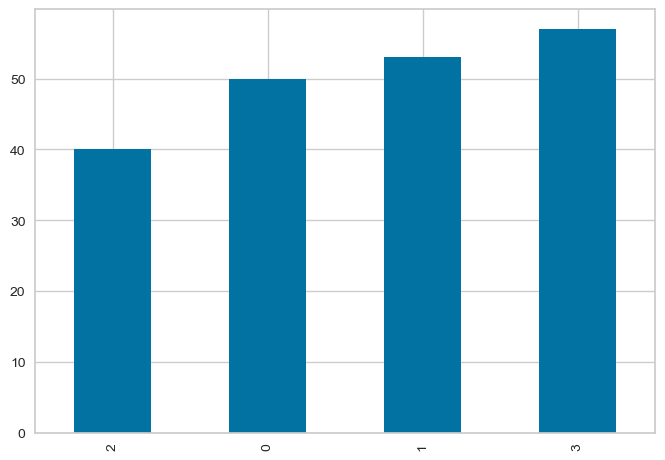

In [76]:
print(result_model3["cluster"].value_counts())
result_model3["cluster"].value_counts().sort_values().plot(kind='bar')

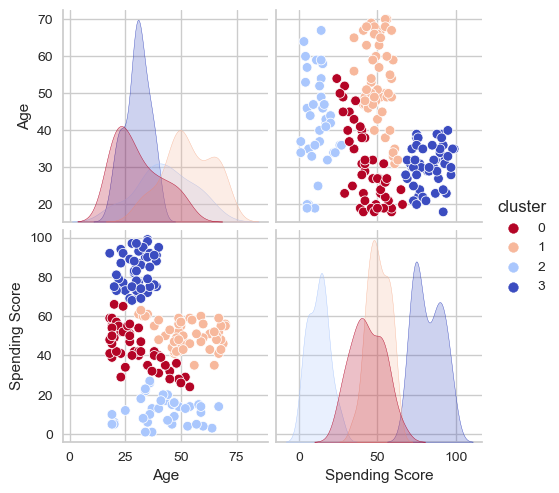

In [77]:
sns.pairplot(result_model3[['Age', 'Spending Score', 'cluster']], hue='cluster' ,palette= "coolwarm_r")

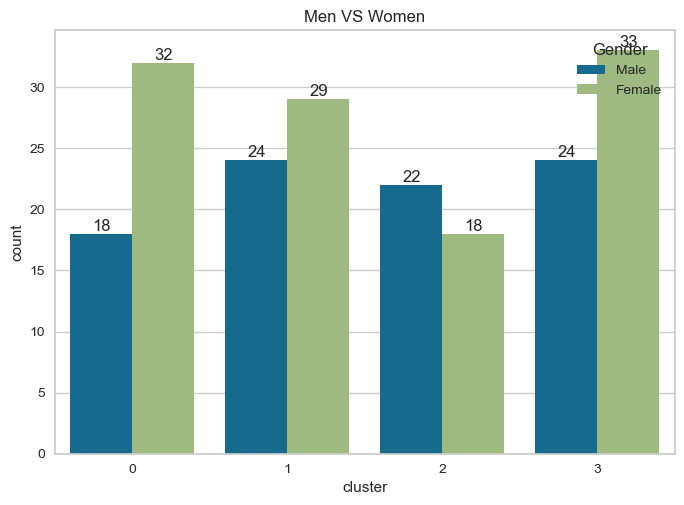

In [78]:
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=result_model3.cluster , hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

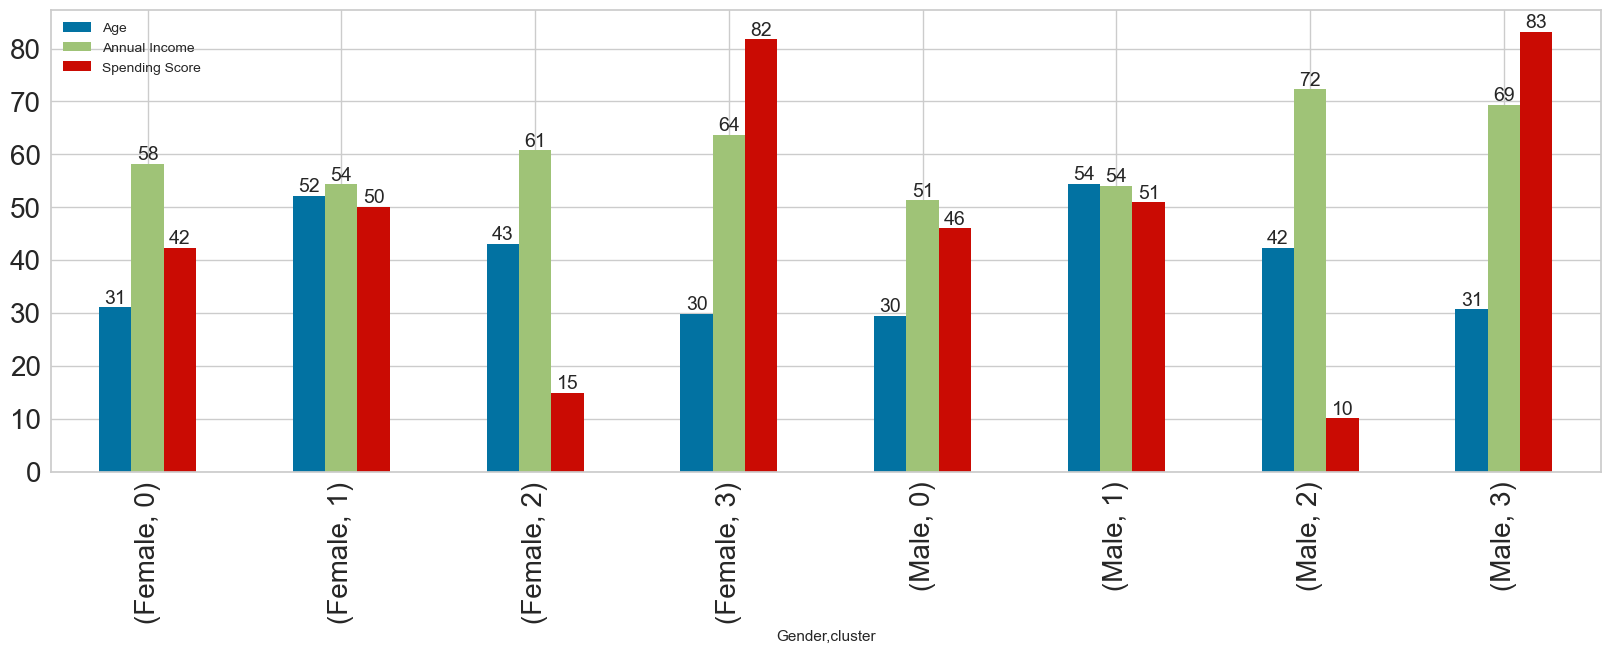

In [79]:
ax = result_model3.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

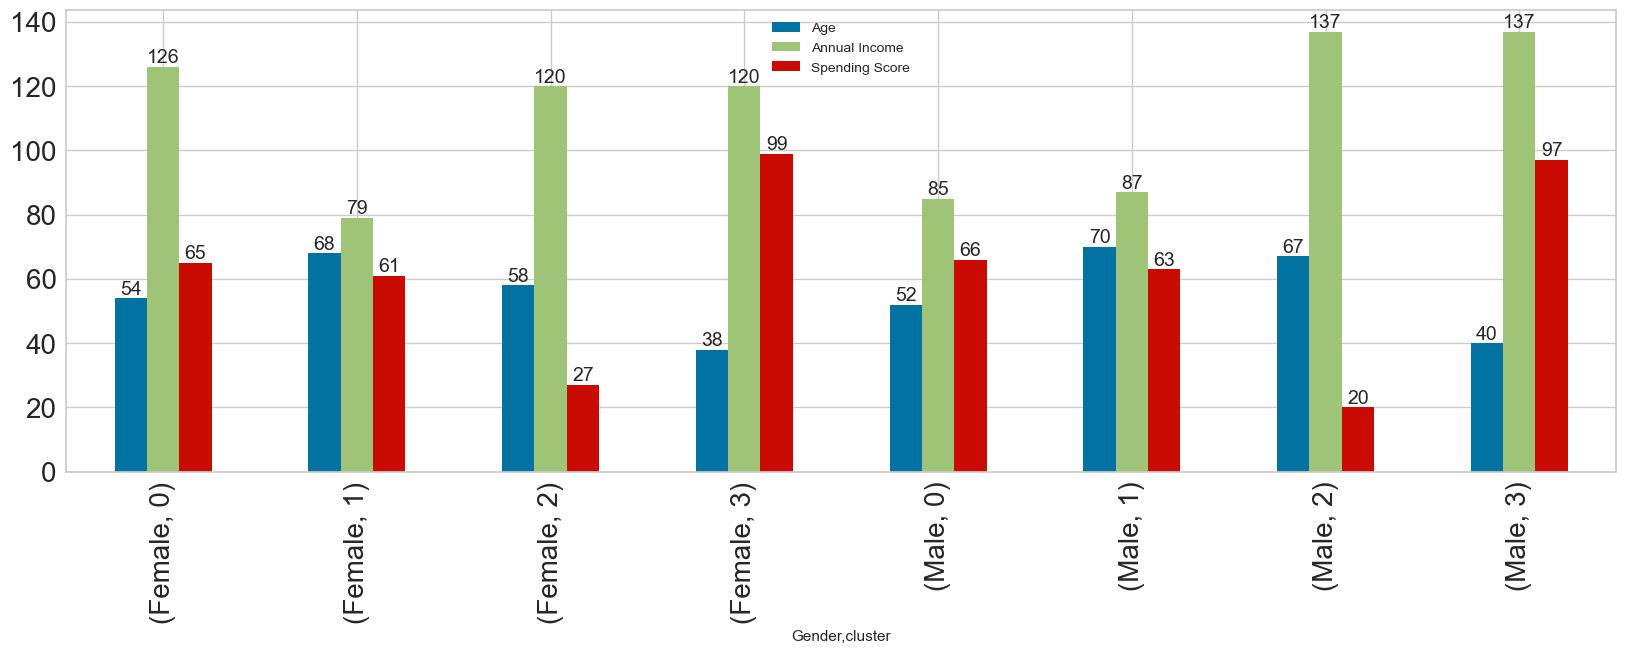

In [80]:
ax = result_model3.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).max().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

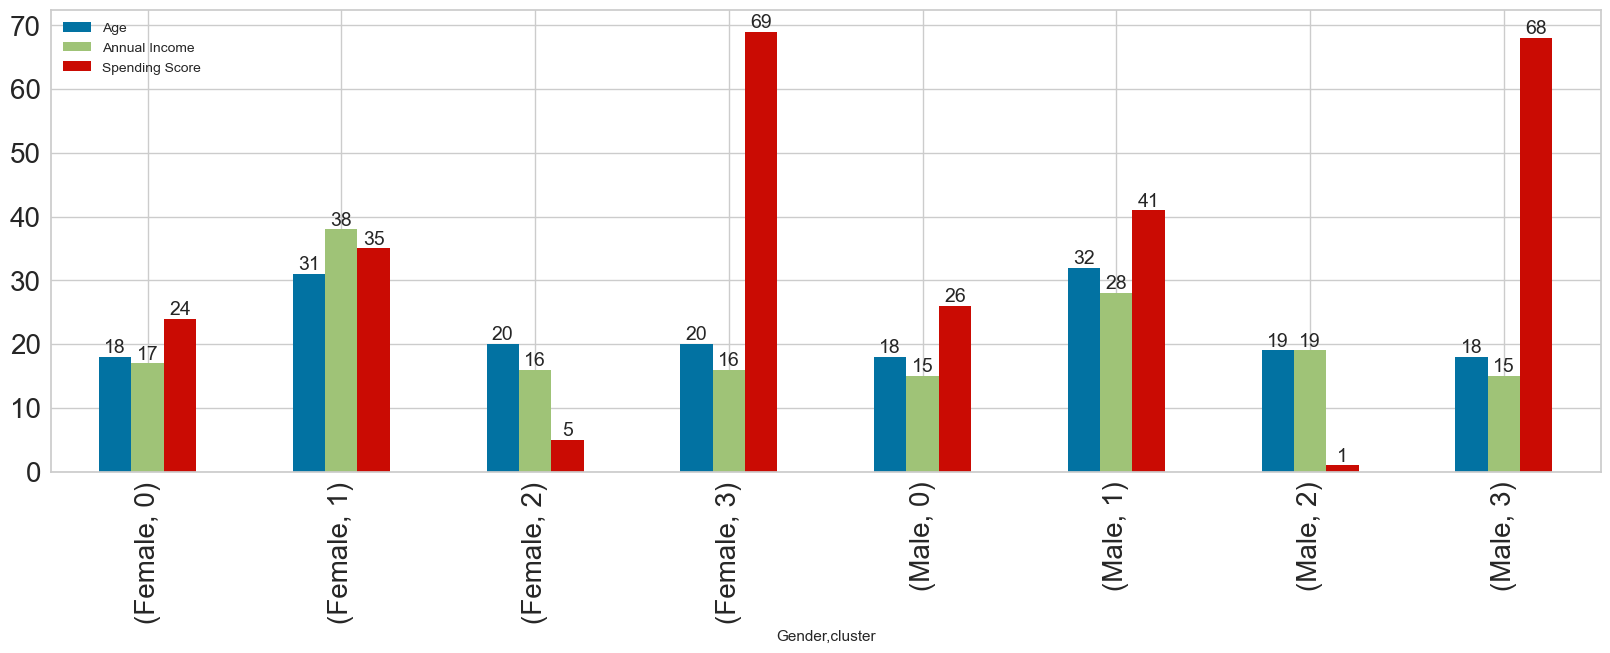

In [81]:
ax = result_model3.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).min().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

# Conclusion of Agglomerative model (Age & Spending Score)


- Class0(25%)(**Unstable Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 25 and the most is 65.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 There is no specific age range for males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers wide different ages and wide different spending.<br> &ensp;
  
- Class1(26.5%)(**Normal Spender Customers**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 37 and the most is 62.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 age above 31 for both in males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 older customers have normal spend of their money.<br> &ensp;
 
- Class2(20%)(**Low Spender Customers**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 3 and the most is 24 .<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 There is no specific age range for males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers wide different ages and they don not spend their money.<br> &ensp;
                                          
- Class3(28.5%)(**Super Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 68 and the most is 98. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 age about 20 to 40 for both in males&females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 middle age customers tend to spend of their money.<br> &ensp;



---

---

---

---

#### Annual Income and Spending Score- x2

In [82]:
clusters4 = his_model2.labels_
clusters4

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [83]:
s4 =silhouette_score(df3, his_model2.labels_)
s4

0.5529945955148897

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

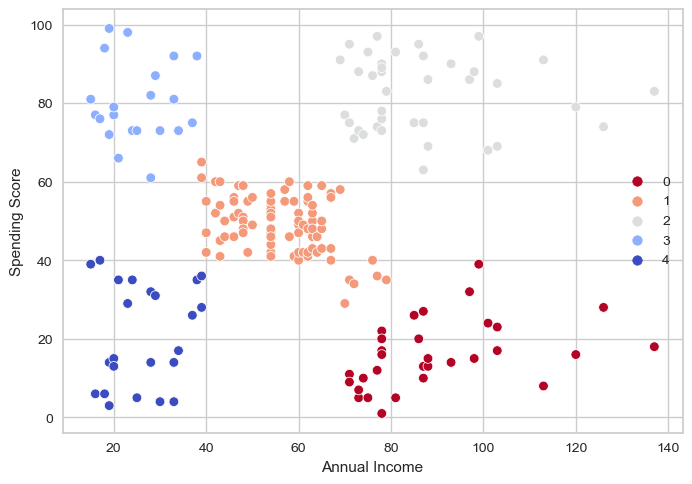

In [84]:
sns.scatterplot(data= df3 , x= df3['Annual Income'] , y= df3['Spending Score'] , hue= clusters4 , palette= "coolwarm_r" )

In [85]:
temp = pd.DataFrame(clusters4 ,columns=["cluster"])
dataframes = [df,temp]
print(df.shape)
print(temp.shape)

(200, 5)
(200, 1)


In [86]:
result_model4 = pd.concat( dataframes ,axis=1)
result_model4.shape

(200, 6)

1    85
2    39
0    32
4    23
3    21
Name: cluster, dtype: int64


<Axes: >

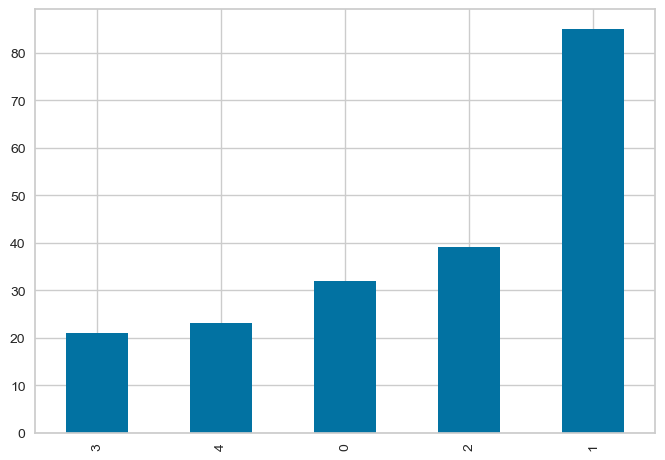

In [87]:
print(result_model4["cluster"].value_counts())
result_model4["cluster"].value_counts().sort_values().plot(kind='bar')

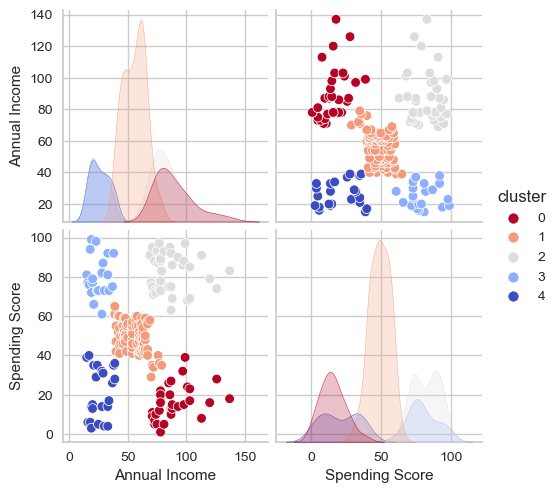

In [88]:
sns.pairplot(result_model4[['Annual Income', 'Spending Score', 'cluster']], hue='cluster' ,palette= "coolwarm_r")

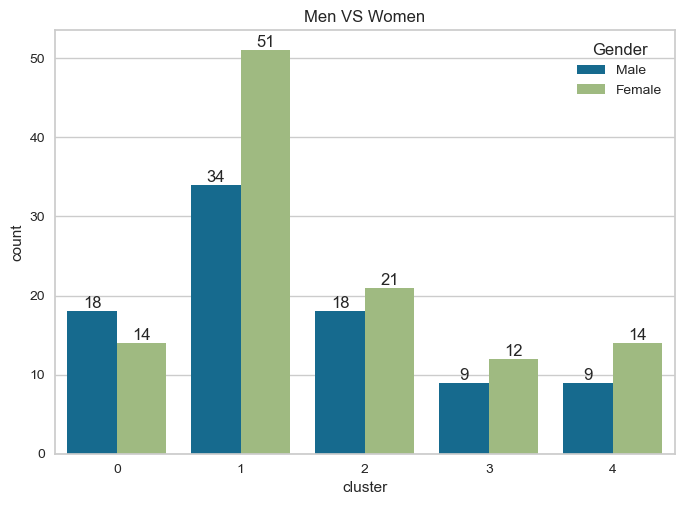

In [89]:
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=result_model4.cluster , hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

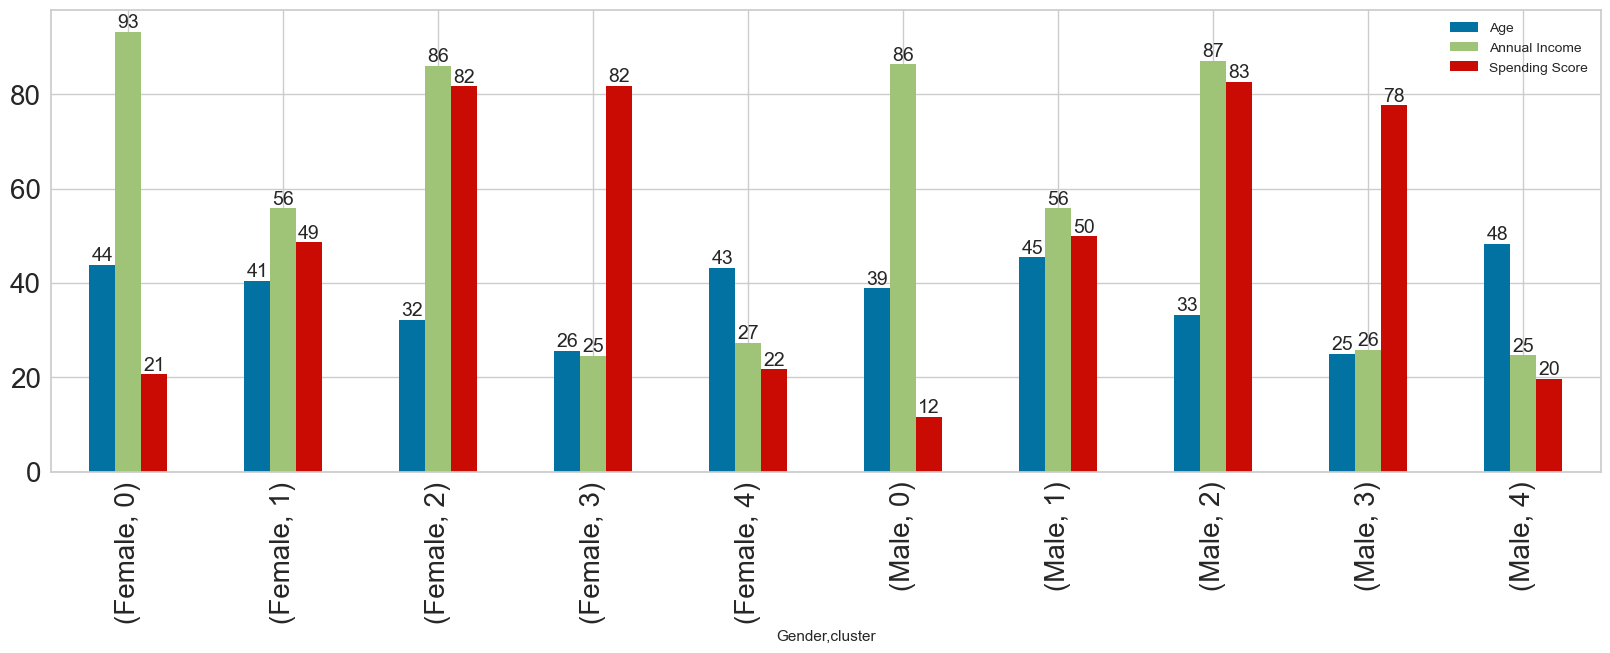

In [90]:
ax = result_model4.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

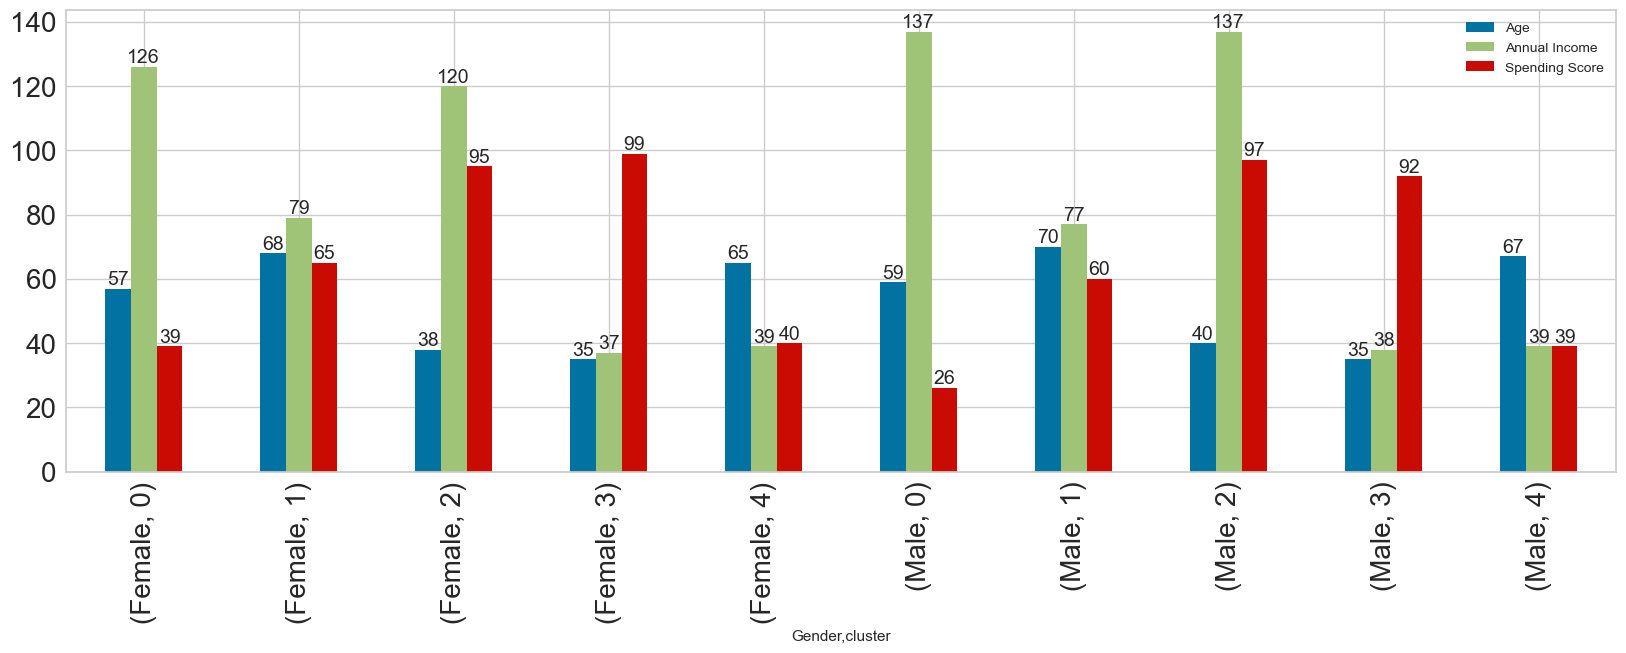

In [91]:
ax = result_model4.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).max().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

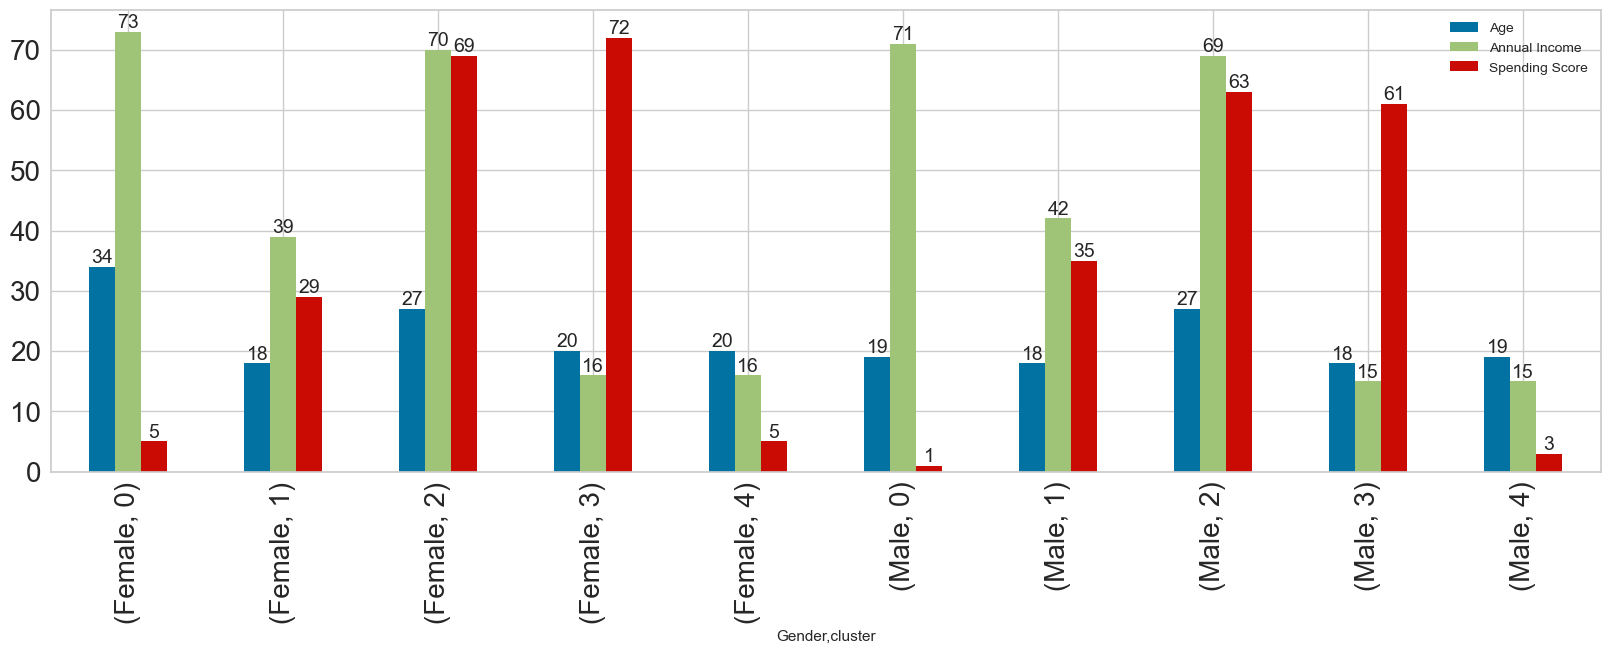

In [92]:
ax = result_model4.drop(columns = ['CustomerID']).groupby(["Gender", "cluster"]).min().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

### Conclusion of Agglomerative model (Annual Income & Spending Score)



- Class0(16%)(**Low Spender Customers 1**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 
the minimum spending is 1 and the most is 39.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 71 to 137 males and 127 for females.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have high income but they do not spend thier money. <br> &ensp;
 
 
- Class1(42.5%)(**Normal Spender Customers**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 33 and the most is 63.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
  income about 40 to 78 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have normal income and normal spend of their money. <br> &ensp;
  

- Class2(10.5%)(**Super Spender Customers 2**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 65 and the most is 97. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 70 to 137 males and 120 for females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have high income and high spend of their money.

                                          
- Class3(11%)(**Super Spender Customers 1**): <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 61 roe male and 71 for female and the most is 99. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 15 to 38 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have low income but they spending their money. <br> &ensp;

 
- Class4(11.5%)(**Low Spender Customers 2**):  <br> &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
the minimum spending is 3 and the most is 40.<br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 income about 15 to 39 in both males&females. <br>
 &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
 Customers have low income and low spend of their money.<br> &ensp;



---

---

## Silhouette score for each model

In [93]:
print("Kmeans model (Age & Spending Score )" , round(s1 ,3)) 
print("Hierarchical model (Age & Spending Score)" ,round(s3 ,2) )
print("Kmeans model ( Annual Income & Score Spending Score)" ,round(s2 ,2) )
print("Hierarchical model ( Annual Income & ScoreSpending Score )" ,round(s4 ,2) )

Kmeans model (Age & Spending Score ) 0.5
Hierarchical model (Age & Spending Score) 0.46
Kmeans model ( Annual Income & Score Spending Score) 0.55
Hierarchical model ( Annual Income & ScoreSpending Score ) 0.55


---

---

# Conclusion
### both Kmeans and  Agglomerative gave same main clusters with a little diffrent in ranges.
 **cluster baase on Age and Spending Score gave 4 clusters:**  <br>
1- Unstable Spender Customers <br>
2- Normal Spender Customers <br>
3- Low Spender Customers <br>
4- Super Spender Customers <br>

 **cluster baase on Age and Spending Score gave 5 clusters:**  <br>
1- Low Spender Customers 1 <br>
2- Low Spender Customers 2 <br>
3- Normal Spender Customers <br>
4- Super Spender Customers 1 <br>
5- Super Spender Customers 1 <br>
 

---

---

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___